# **Programming for Data Science**
## **Final Project**

**Student Information:**

Student D|Full Name
-|-
21127469|Vo Thanh Tu
22127117|Ly Lien Hoa
22127232|Le Thi Ngoc Linh

## **1. Collecting Data** 

### **1.1. About dataset**
- The dataset provides historical sales data of an electronics company, encompassing 16 distinct features to analyze business performance.
- The analysis focuses on identifying sales trends, evaluating product performance, and assessing customer loyalty to optimize marketing efforts, enhance engagement, and drive growth in the electronics category.

### **1.2. License & Copyright**
#### Released under [**MIT License**](https://www.mit.edu/~amini/LICENSE.md)

- Copyright (c) 2013 Mark Otto.

- Copyright (c) 2017 Andrew Fong.

### **1.3. How did authors collect data?**
- The author, Cameron Seamons, generated this dataset which does not represent real-world transactions or actual customer data. All values in this dataset, including customer IDs, ages, product types, and ratings, are fictitious and created for the purpose of analysis and modeling.

- Initially, the dataset had exactly 50% distribution for both gender and loyalty status. The author adjusted these distributions to make them more realistic. Additionally, customer information remains consistent across all of their orders.

## **2. Exploring Data Analysis (EDA)**

### **2.1 Overal Dataset view**

**Import libraries**

In [1]:
# imports
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Clear annoying package and version warnings
import warnings
warnings.filterwarnings('ignore')

**Read dataset**

In [2]:
df = pd.read_csv('Data/sales.csv')

In [3]:
df.head()

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56


#### **Data shape**

In [4]:
rows, cols = df.shape

print(f'Number of rows: {rows}')
print(f'Number of cols: {cols}')

Number of rows: 20000
Number of cols: 16


Dataset have 20000 rows and 16 columns.

### **2.2 Row Detail**

##### **Row meaning**
- The dataset comprises sales information for individual transactions, with each row corresponding to a unique purchase record. Each record includes detailed transaction-related data, providing insights into customer behavior, product performance, and sales metrics. The dataset is structured such that each row represents a comprehensive snapshot of a single transaction, enabling a thorough analysis of sales trends and factors specific to each purchase.

##### **Check duplicate**

In [5]:
dup_rows = df[df.duplicated()]

print(f'Number of duplicated rows: {len(dup_rows)}')

Number of duplicated rows: 0


The dataset has no duplicates row.

### **2.3 Column Detail**

In [6]:
descriptions = pd.read_csv('Data/description.csv')

pd.set_option('display.max_colwidth', None)
descriptions

,Feature,Description
0,Customer ID,Unique identifier for each customer
1,Age,Age of the customer (numeric)
2,Gender,Gender of the customer (Male or Female)
3,Loyalty Member,"(Yes/No) (Values change by time, so pay attention to who cancelled and who signed up)"
4,Product Type,"Type of electronic product sold (e.g., Smartphone, Laptop, Tablet)"
5,SKU,a unique code for each product
6,Rating,Customer rating of the product (1-5 stars) (Should have no Null Ratings)
7,Order Status,"Status of the order (Completed, Cancelled)"
8,Payment Method,"Method used for payment (e.g., Cash, Credit Card, Paypal)"
9,Total Price,Total price of the transaction (numeric)


In [7]:
# Display the information about the dataset
print("Sales Dataset Info:")  
print(df.info()) 

Sales Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer ID        20000 non-null  int64  
 1   Age                20000 non-null  int64  
 2   Gender             19999 non-null  object 
 3   Loyalty Member     20000 non-null  object 
 4   Product Type       20000 non-null  object 
 5   SKU                20000 non-null  object 
 6   Rating             20000 non-null  int64  
 7   Order Status       20000 non-null  object 
 8   Payment Method     20000 non-null  object 
 9   Total Price        20000 non-null  float64
 10  Unit Price         20000 non-null  float64
 11  Quantity           20000 non-null  int64  
 12  Purchase Date      20000 non-null  object 
 13  Shipping Type      20000 non-null  object 
 14  Add-ons Purchased  15132 non-null  object 
 15  Add-on Total       20000 non-null  float64
dtypes:

In [8]:
df.dtypes

Customer ID            int64
Age                    int64
Gender                object
Loyalty Member        object
Product Type          object
SKU                   object
Rating                 int64
Order Status          object
Payment Method        object
Total Price          float64
Unit Price           float64
Quantity               int64
Purchase Date         object
Shipping Type         object
Add-ons Purchased     object
Add-on Total         float64
dtype: object

In [9]:
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'], format='%Y-%m-%d')

df.dtypes

Customer ID                   int64
Age                           int64
Gender                       object
Loyalty Member               object
Product Type                 object
SKU                          object
Rating                        int64
Order Status                 object
Payment Method               object
Total Price                 float64
Unit Price                  float64
Quantity                      int64
Purchase Date        datetime64[ns]
Shipping Type                object
Add-ons Purchased            object
Add-on Total                float64
dtype: object

In [10]:
# Display the summary statistics of the dataset
print("Missing values in Sales Dataset:")  
print(df.isnull().sum())  

Missing values in Sales Dataset:
Customer ID             0
Age                     0
Gender                  1
Loyalty Member          0
Product Type            0
SKU                     0
Rating                  0
Order Status            0
Payment Method          0
Total Price             0
Unit Price              0
Quantity                0
Purchase Date           0
Shipping Type           0
Add-ons Purchased    4868
Add-on Total            0
dtype: int64


In [11]:
# Display the percentage of missing values in the dataset
print("\nPercentage of missing values in Sales Dataset:")
print((df.isnull().sum() / len(df)) * 100)


Percentage of missing values in Sales Dataset:
Customer ID           0.000
Age                   0.000
Gender                0.005
Loyalty Member        0.000
Product Type          0.000
SKU                   0.000
Rating                0.000
Order Status          0.000
Payment Method        0.000
Total Price           0.000
Unit Price            0.000
Quantity              0.000
Purchase Date         0.000
Shipping Type         0.000
Add-ons Purchased    24.340
Add-on Total          0.000
dtype: float64


In [12]:
# Fill missing gender values with mode
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
# Fill missing Add-ons Purchased
df["Add-ons Purchased"].fillna("None", inplace=True)
df

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,None,0.00
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,27,Female,No,Smartphone,SMP234,4,Completed,Bank Transfer,6838.08,1139.68,6,2024-06-15,Expedited,None,0.00
19996,19996,27,Female,Yes,Laptop,LTP123,4,Cancelled,Credit Card,2697.28,674.32,4,2024-07-18,Standard,None,0.00
19997,19996,27,Female,No,Headphones,HDP456,4,Completed,Bank Transfer,1805.90,361.18,5,2024-08-26,Standard,"Impulse Item, Extended Warranty, Accessory",198.98
19998,19997,27,Male,No,Headphones,HDP456,1,Cancelled,Bank Transfer,2528.26,361.18,7,2024-01-06,Expedited,"Extended Warranty, Accessory",101.34


### **2.3 Column Detail**

In [13]:
first_row = df.iloc[0]

types = {'column': [], 'type': []}
for col, val in first_row.items():
    types['column'].append(col)
    types['type'].append(type(val))

types_df = pd.DataFrame(types)
types_df['type'] = types_df['type'].astype(str).str.split("'").str[1]

types_df

,column,type
0,Customer ID,numpy.int64
1,Age,numpy.int64
2,Gender,str
3,Loyalty Member,str
4,Product Type,str
5,SKU,str
6,Rating,numpy.int64
7,Order Status,str
8,Payment Method,str
9,Total Price,numpy.float64


### **2.4 Distribution Value**

#### **Distribution of numeric values**
##### **Description**

For columns with numeric data types, we calculate:
- missing_ratio: Percentage (from 0 to 100) of missing values
- standard_deviation: Standard deviation
- min: The min
- lower_quartile: The lower quartile
- median: The median
- upper_quartile: The upper quartile
- max: The max

In [14]:
num_col_df = df.select_dtypes(include='number')

def missing_ratio(s):
    return (s.isna().mean() * 100).round(1)

def median(df):
    return (df.quantile(0.5)).round(1)

def lower_quartile(df):
    return (df.quantile(0.25)).round(1)

def upper_quartile(df):
    return (df.quantile(0.75)).round(1)

num_col_info_df = num_col_df.agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"])
num_col_info_df

,Customer ID,Age,Rating,Total Price,Unit Price,Quantity,Add-on Total
missing_ratio,0.0,0.0,0.0,0.00,0.00,0.0,0.00
min,1000.0,18.0,1.0,20.75,20.75,1.0,0.00
lower_quartile,5478.0,33.0,2.0,1139.70,361.20,3.0,7.60
median,10499.5,49.0,3.0,2534.50,464.00,5.0,51.70
upper_quartile,15504.0,65.0,4.0,4639.60,791.20,8.0,93.80
max,19998.0,80.0,5.0,11396.80,1139.68,10.0,292.77


- The range value of each columns:

In [15]:
min_max_info = num_col_df.agg(["min", "max"])
min_max_info

,Customer ID,Age,Rating,Total Price,Unit Price,Quantity,Add-on Total
min,1000,18,1,20.75,20.75,1,0.00
max,19998,80,5,11396.80,1139.68,10,292.77


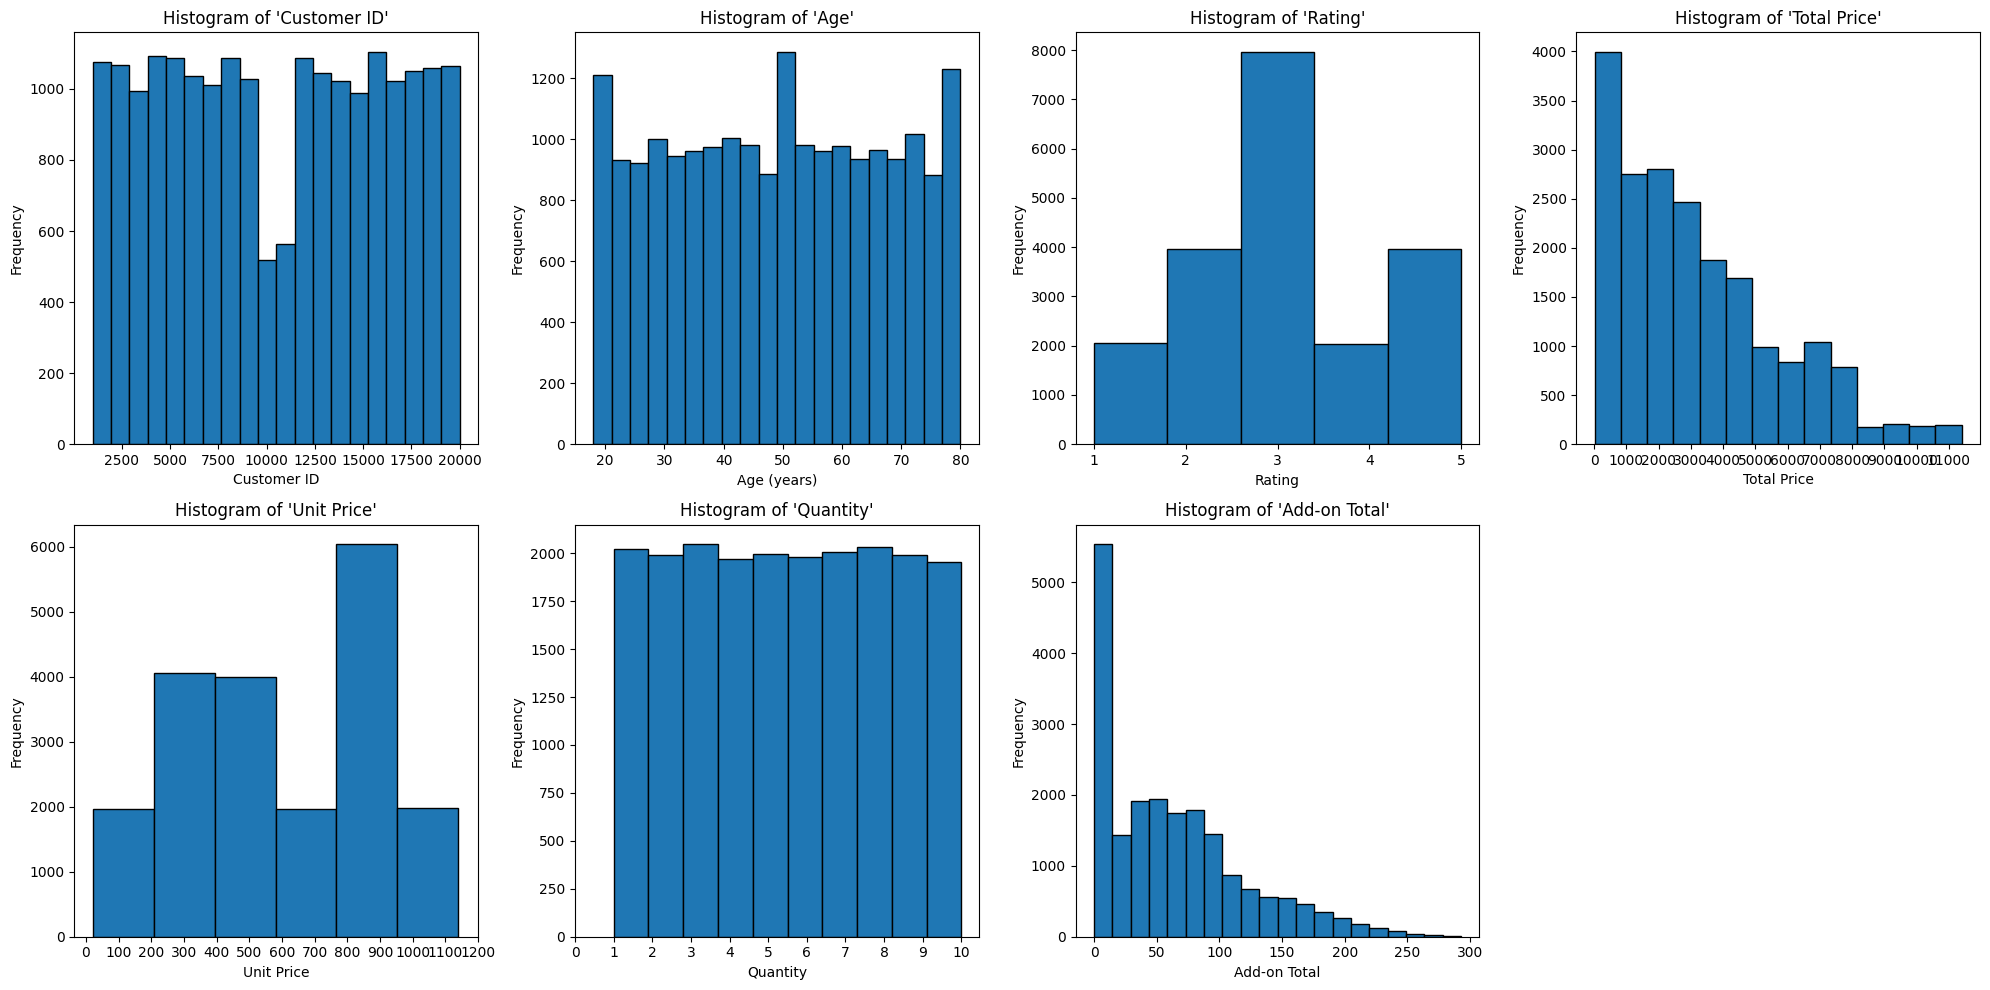

In [16]:
column_config = {
    'Customer ID': {'bins': 20, 'unit': '', 'xticks': None},
    'Age': {'bins': 20, 'unit': 'years', 'xticks': None},
    'Rating': {'bins': 5, 'unit': '', 'xticks': range(1, 6)},
    'Total Price': {
        'bins': 14,
        'unit': '',
        'xticks': range(0, int(num_col_df['Total Price'].max()) + 200, 1000),
    },
    'Unit Price': {
        'bins': 6,
        'unit': '',
        'xticks': range(0, int(num_col_df['Unit Price'].max()) + 100, 100),
    },
    'Quantity': {
        'bins': None,
        'unit': '',
        'xticks': range(0, int(num_col_df['Quantity'].max()) + 1),
    },
    'Add-on Total': {'bins': 20, 'unit': '', 'xticks': None},
}

num_cols = 4
num_rows = (len(column_config) - 1) // num_cols + 1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))
axes = axes.flatten()

for i, (col, config) in enumerate(column_config.items()):
    bins = config['bins']
    unit = config['unit']
    xticks = config['xticks']

    axes[i].hist(num_col_df[col], bins=bins, edgecolor='black')
    axes[i].set_title(f"Histogram of '{col}'")
    axes[i].set_xlabel(f"{col} ({unit})" if unit else col)
    axes[i].set_ylabel('Frequency')

    if xticks:
        axes[i].set_xticks(xticks)

# Xóa các trục thừa nếu không sử dụng hết
for i in range(len(column_config), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

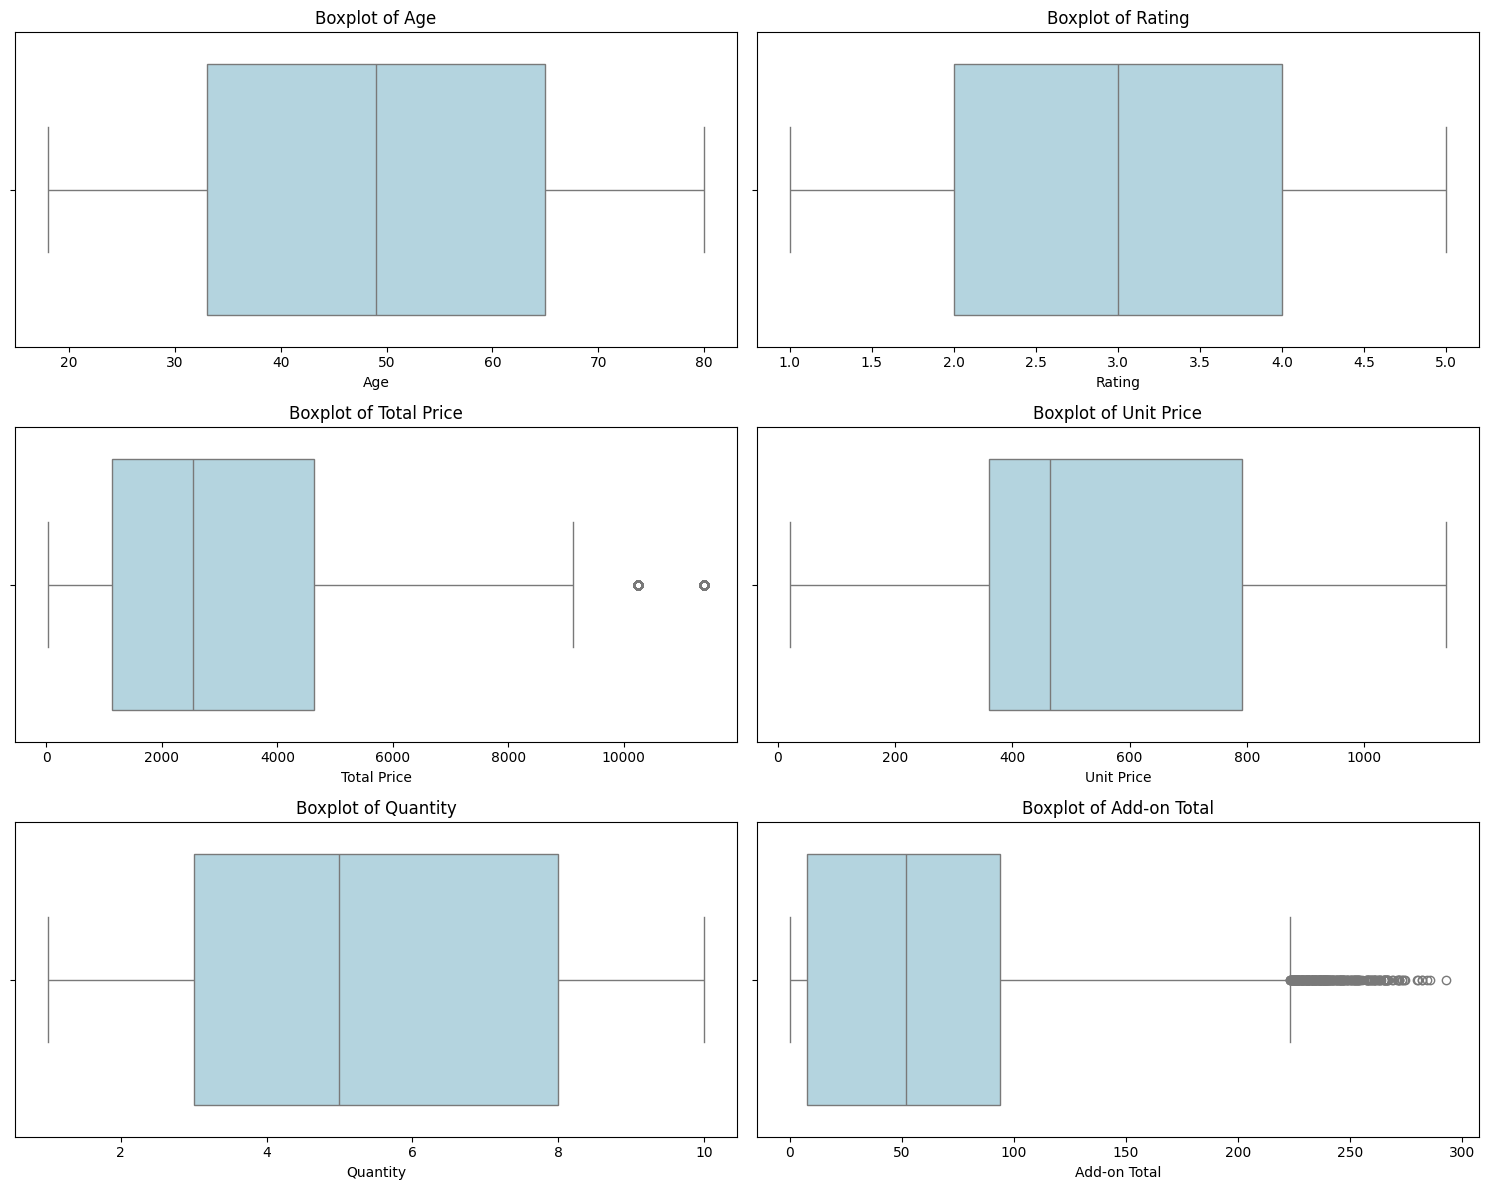

In [17]:
num_col_df = num_col_df.columns.drop('Customer ID')

fig_row = len(num_col_df) // 2 + len(num_col_df) % 2
fig, axes = plt.subplots(fig_row, 2, figsize=(15, 4 * fig_row))

for i, col in enumerate(num_col_df):
    row = i // 2
    col_idx = i % 2
    sns.boxplot(x=df[col], ax=axes[row, col_idx], color="lightblue")
    axes[row, col_idx].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

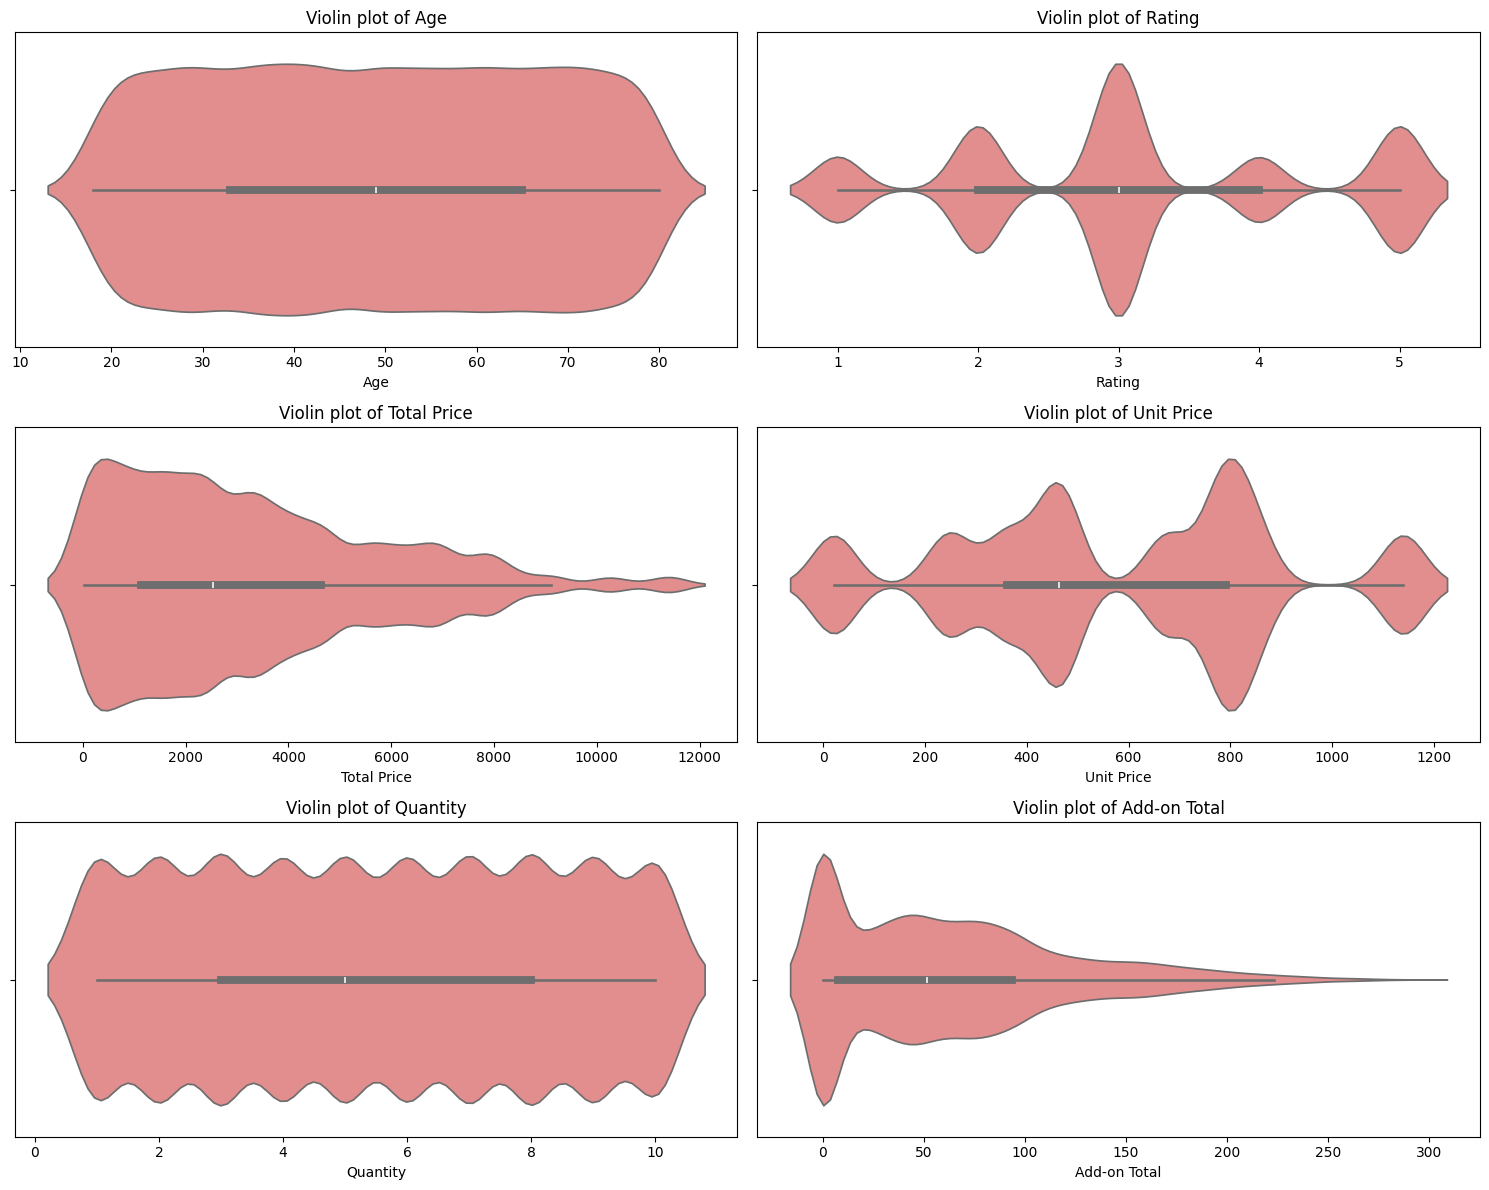

In [18]:
fig_row = len(num_col_df) // 2 + len(num_col_df) % 2
fig, axes = plt.subplots(fig_row, 2, figsize=(15, 4 * fig_row))

for i, col in enumerate(num_col_df):
    row = i // 2
    col_idx = i % 2
    sns.violinplot(x=df[col], ax=axes[row, col_idx], color="lightcoral")
    axes[row, col_idx].set_title(f'Violin plot of {col}')
    
plt.tight_layout()
plt.show()

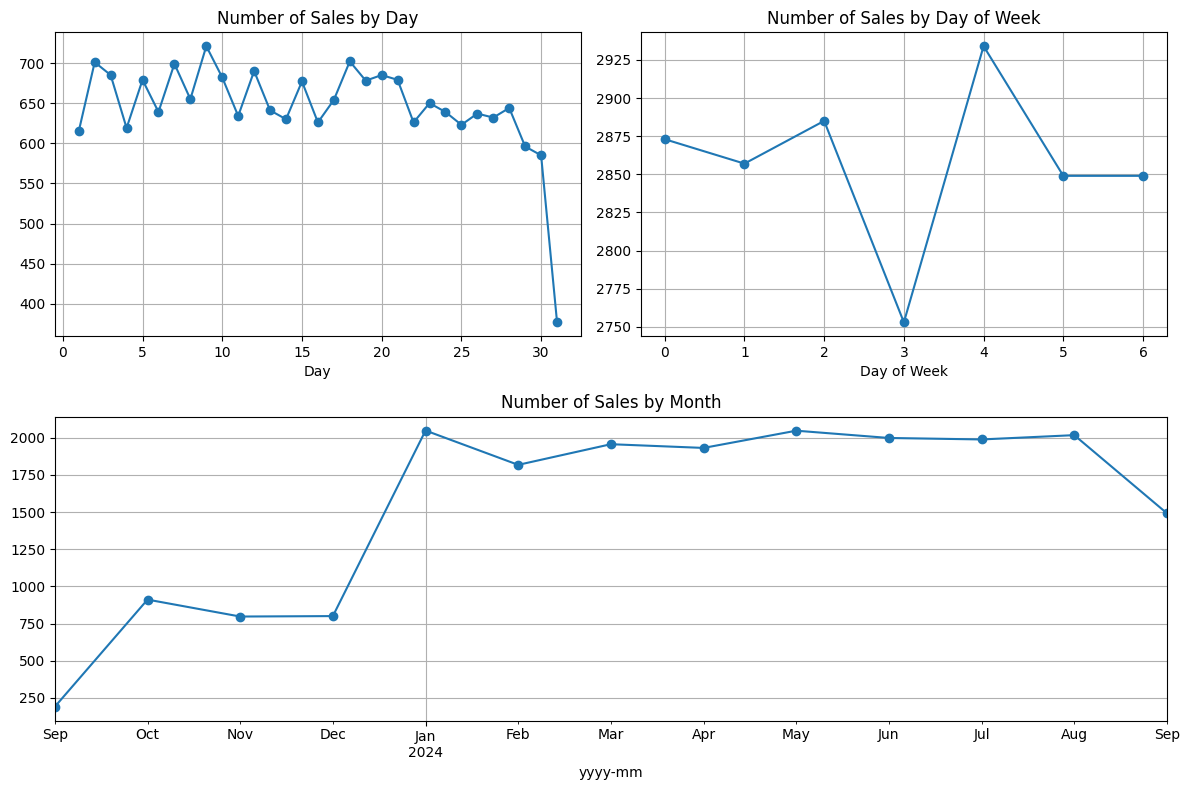

In [19]:
# Convert Purchase Date to datetime
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])

# Plot for Purchase Date
datetime_eda_df = df.copy()
datetime_eda_df['Year'] = datetime_eda_df['Purchase Date'].dt.year
datetime_eda_df['Month'] = datetime_eda_df['Purchase Date'].dt.month
datetime_eda_df['Day'] = datetime_eda_df['Purchase Date'].dt.day
datetime_eda_df['Day of Week'] = datetime_eda_df['Purchase Date'].dt.dayofweek
datetime_eda_df["yyyy-mm"] = datetime_eda_df["Purchase Date"].dt.to_period('M')

fig, axd = plt.subplot_mosaic([['A', 'B'],
                               ['C', 'C']],
                              figsize=(12, 8), layout="constrained")

# Daily sales trend
daily_sales = datetime_eda_df.groupby('Day').size()
daily_sales.plot(marker='o', ax=axd['A'])
axd['A'].set_title('Number of Sales by Day')
axd['A'].grid(True)

# Weekly sales trend
weekly_sales = datetime_eda_df.groupby('Day of Week').size()
weekly_sales.plot(marker='o', ax=axd['B'])
axd['B'].set_title('Number of Sales by Day of Week')
axd['B'].grid(True)

datetime_eda_df.groupby('yyyy-mm').size().plot(kind='line', marker='o', ax=axd['C'])
axd['C'].set_title('Number of Sales by Month')
axd['C'].grid(True)

plt.tight_layout()
plt.show()

In [20]:
edited_sales_df = df.copy()
# convert binary columns to 0 and 1
edited_sales_df["Is Male"] = edited_sales_df["Gender"].map(lambda val: 1 if val == "Male" else 0)
edited_sales_df["Loyalty Member"] = edited_sales_df["Loyalty Member"].map(lambda val:1 if val == "Yes" else 0)
edited_sales_df["Order Status"] = edited_sales_df["Order Status"].map(lambda val:1 if val == "Completed" else 0)
edited_sales_df.describe()

,Customer ID,Age,Loyalty Member,Rating,Order Status,Total Price,Unit Price,Quantity,Purchase Date,Add-on Total,Is Male
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000,20000.000000,20000.000000
mean,10483.526550,48.994100,0.217150,3.093950,0.671600,3180.133419,578.631867,5.485550,2024-04-18 10:42:18.720000256,62.244848,0.508250
min,1000.000000,18.000000,0.000000,1.000000,0.000000,20.750000,20.750000,1.000000,2023-09-24 00:00:00,0.000000,0.000000
25%,5478.000000,33.000000,0.000000,2.000000,0.000000,1139.680000,361.180000,3.000000,2024-02-05 00:00:00,7.615000,0.000000
50%,10499.500000,49.000000,0.000000,3.000000,1.000000,2534.490000,463.960000,5.000000,2024-04-24 00:00:00,51.700000,1.000000
75%,15504.000000,65.000000,0.000000,4.000000,1.000000,4639.600000,791.190000,8.000000,2024-07-08 00:00:00,93.842500,1.000000
max,19998.000000,80.000000,1.000000,5.000000,1.000000,11396.800000,1139.680000,10.000000,2024-09-23 00:00:00,292.770000,1.000000
std,5631.732525,18.038745,0.412316,1.223764,0.469643,2544.978675,312.274076,2.870854,NaN,58.058431,0.499944


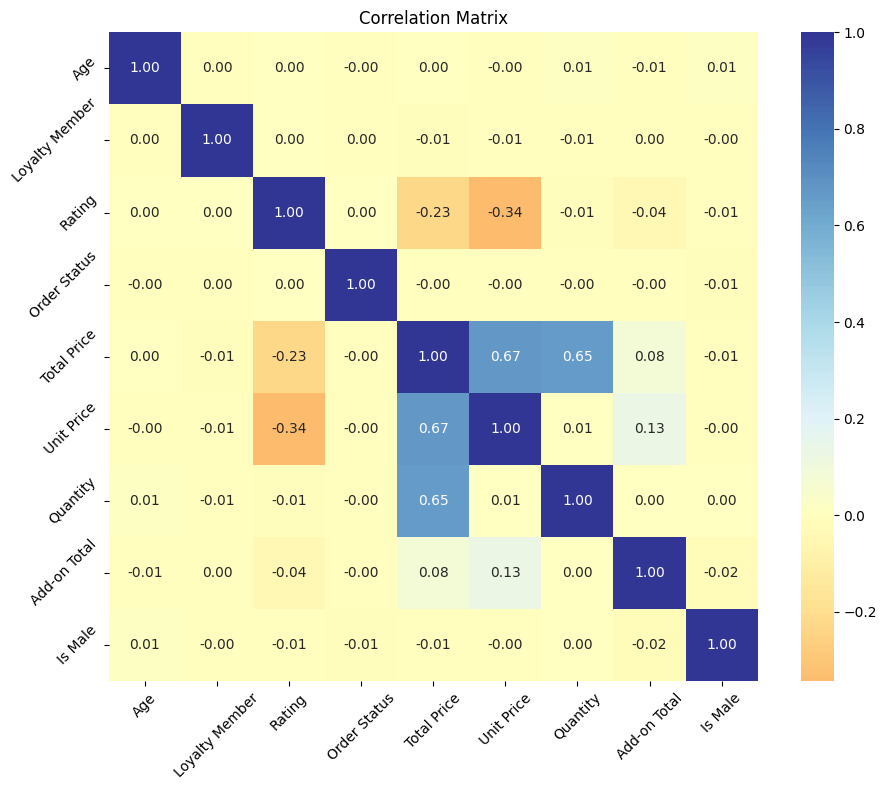

In [21]:
# Create correlation matrix for numerical variables
numeric_df = edited_sales_df.select_dtypes(include=['int64', 'float64']).drop(
    'Customer ID', axis=1)
corr_matrix = numeric_df.corr()  

# Plot heatmap
plt.figure(figsize=(10, 8))  
sns.heatmap(corr_matrix, annot=True, cmap='RdYlBu', center=0, fmt=".2f", square=True)
plt.yticks(rotation=45)
plt.xticks(rotation=45)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

#### **Distribution of category values**

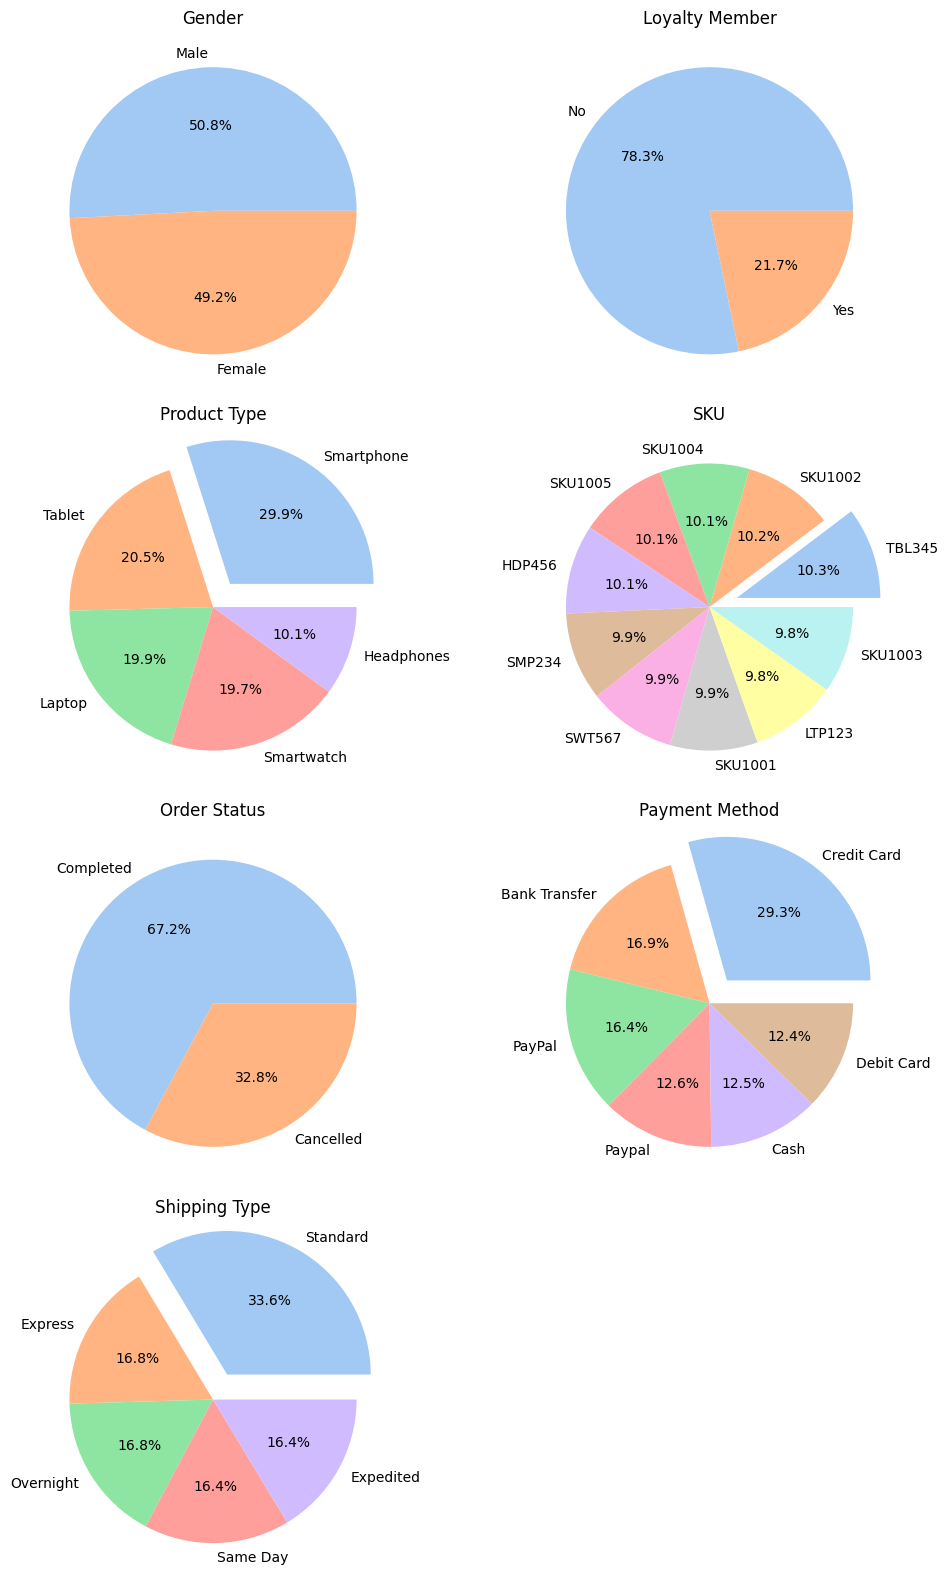

In [22]:
# Get categorical columns with less than 20 unique values for pie charts
categorical_cols = [col for col in df.select_dtypes(include=['object']).columns 
                   if len(df[col].unique()) <= 20]

fig_row = len(categorical_cols) // 2 + len(categorical_cols) % 2

# Plot pie charts for categorical columns
fig, axes = plt.subplots(fig_row, 2, figsize=(10, 4 * fig_row))
for i, col in enumerate(categorical_cols):
    ax = axes[i // 2, i % 2]
    highest_idx = df[col].value_counts().idxmax()
    if len(df[col].unique()) > 2:
        explode = [0.2 if idx == highest_idx else 0 for idx in df[col].value_counts().index]
    else:
        explode = None
    colors = sns.color_palette('pastel')
    df[col].value_counts().plot.pie(autopct='%1.1f%%', ax=ax, explode=explode, colors=colors)
    ax.set_title(col)
    ax.set_ylabel('')

# Hide empty subplots
for i in range(len(categorical_cols), fig_row * 2):
    fig.delaxes(axes[i // 2, i % 2])
    
plt.tight_layout()
plt.show()

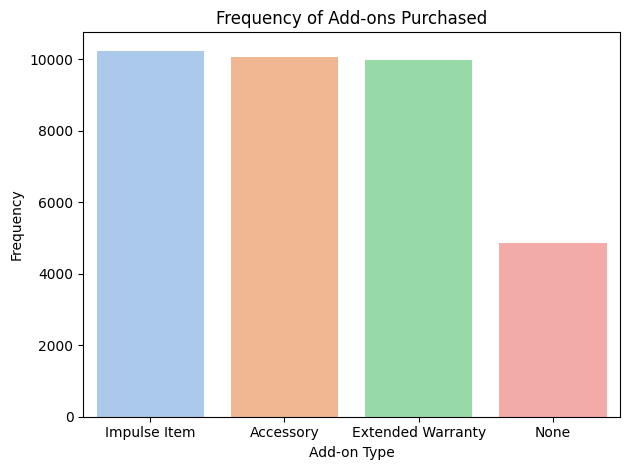

In [23]:
# Frequncy of Add-ons Purchased
addons = df['Add-ons Purchased'].str.split(',').explode().str.strip().value_counts()
sns.barplot(x=addons.index, y=addons.values, palette='pastel', hue=addons.index)
plt.title('Frequency of Add-ons Purchased')
plt.xlabel('Add-on Type')
plt.ylabel('Frequency')
plt.tight_layout()

## **3. Asking Meaning Questions** 

#### **Question 1**: How do day of the week, month and seasonal patterns affect sales performance across different product categories?

**Benefit:**

- Enhances Inventory Planning: By analyzing how seasons and specific days of the week affect product demand, businesses can fine-tune their inventory management to avoid stockouts or excessive surplus.

- Optimizes Staffing Schedules: Understanding sales spikes during certain days or holiday seasons helps in effectively planning staff rosters and ensuring adequate staffing during peak times.

- Informs Marketing Campaign Timing: Sales promotions and marketing efforts are more impactful when scheduled during naturally high-demand periods. This also helps prevent wasted resources on underperforming days.

- Predicts Busy Periods: Accurately anticipating sales surges around weekends, holidays, or weather-driven events provides a clearer forecast of operational needs, improving overall customer satisfaction.

- Promotes Category-Specific Insights: Different products can behave differently under the same seasonal pattern. Identifying category-level nuances ensures you’re targeting the right mix of products at the right moment.


#### **Question 2**: How do loyalty membership statuses evolve over time, and what are the trends in customer behavior regarding membership transitions (e.g., New Member, Regular Member, Churned, Non Member)?
**Benefit**:
- Analyzing the evolution of loyalty membership statuses provides valuable insights into customer behavior and program effectiveness. 

- Understanding these trends helps businesses identify patterns in member retention, new member acquisition, and churn rates. 

- This knowledge enables companies to design targeted loyalty strategies, such as personalized offers for retaining regular members or re-engaging churned customers. 

- By leveraging these insights, businesses can enhance customer satisfaction, increase program participation, and drive long-term revenue growth.


#### **Question 3**:

## **4. Pre-processing & Analyzing Data to Answer each Questions** 

### **4.1 Question 1**

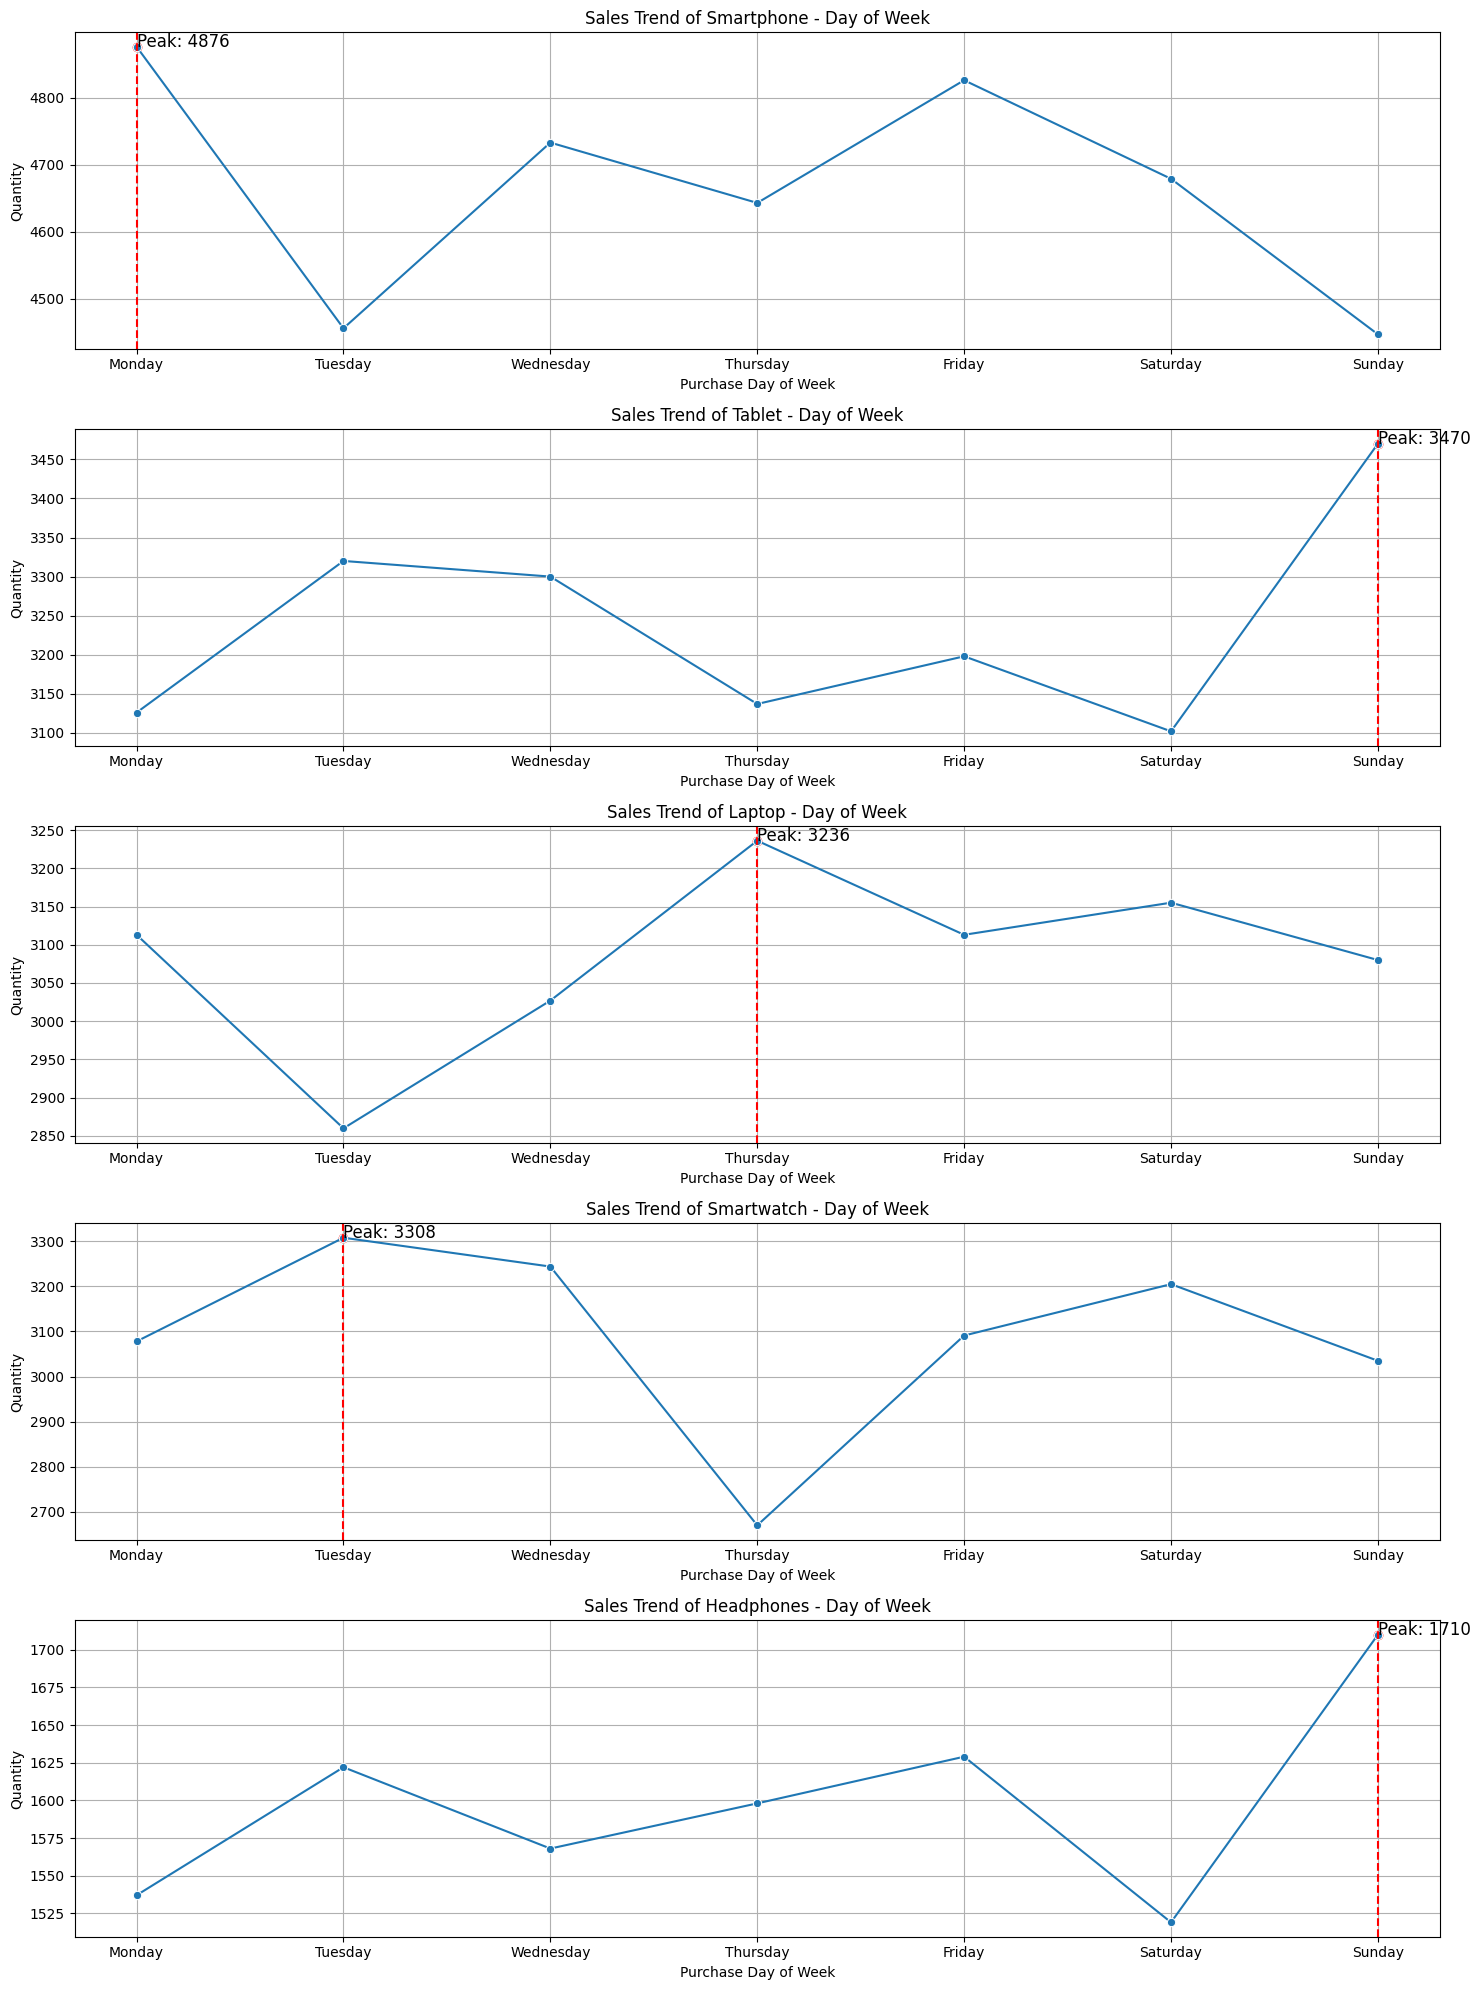

In [24]:
# Sales trend of each product type in days of the week pattern
product_types = datetime_eda_df['Product Type'].value_counts()
fig_row = len(product_types)
fig, axes = plt.subplots(fig_row, 1, figsize=(15, 4 * fig_row))
dayOfWeeksName = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
for id, product in enumerate(product_types.index):
    data = datetime_eda_df[datetime_eda_df['Product Type'] == product]
    grouped_data = data.groupby(
        'Day of Week')['Quantity'].sum().reset_index().sort_index()
    grouped_data['Quantity'] = grouped_data['Quantity'].astype(int)
    grouped_data['Day of Week'] = grouped_data['Day of Week'].map(lambda x: dayOfWeeksName[x])
    
    grouped_data.fillna(0, inplace=True)
    sns.lineplot(data=grouped_data, x='Day of Week',
                 y='Quantity', ax=axes[id], marker='o')
    
    peak_idx = np.argmax(grouped_data['Quantity'])
    peak_x = grouped_data['Day of Week'][peak_idx]
    peak_y = grouped_data['Quantity'][peak_idx]
    axes[id].axvline(peak_x, linestyle='--', color='red', label='Peak')
    axes[id].scatter(peak_x, peak_y, color='red')
    
    axes[id].text(peak_x, peak_y, f'Peak: {peak_y}', fontsize=12)
    axes[id].set_title(f'Sales Trend of {product} - Day of Week')
    axes[id].set_ylabel('Quantity')
    axes[id].set_xlabel('Purchase Day of Week')
    axes[id].grid(True)

plt.tight_layout()
plt.show()

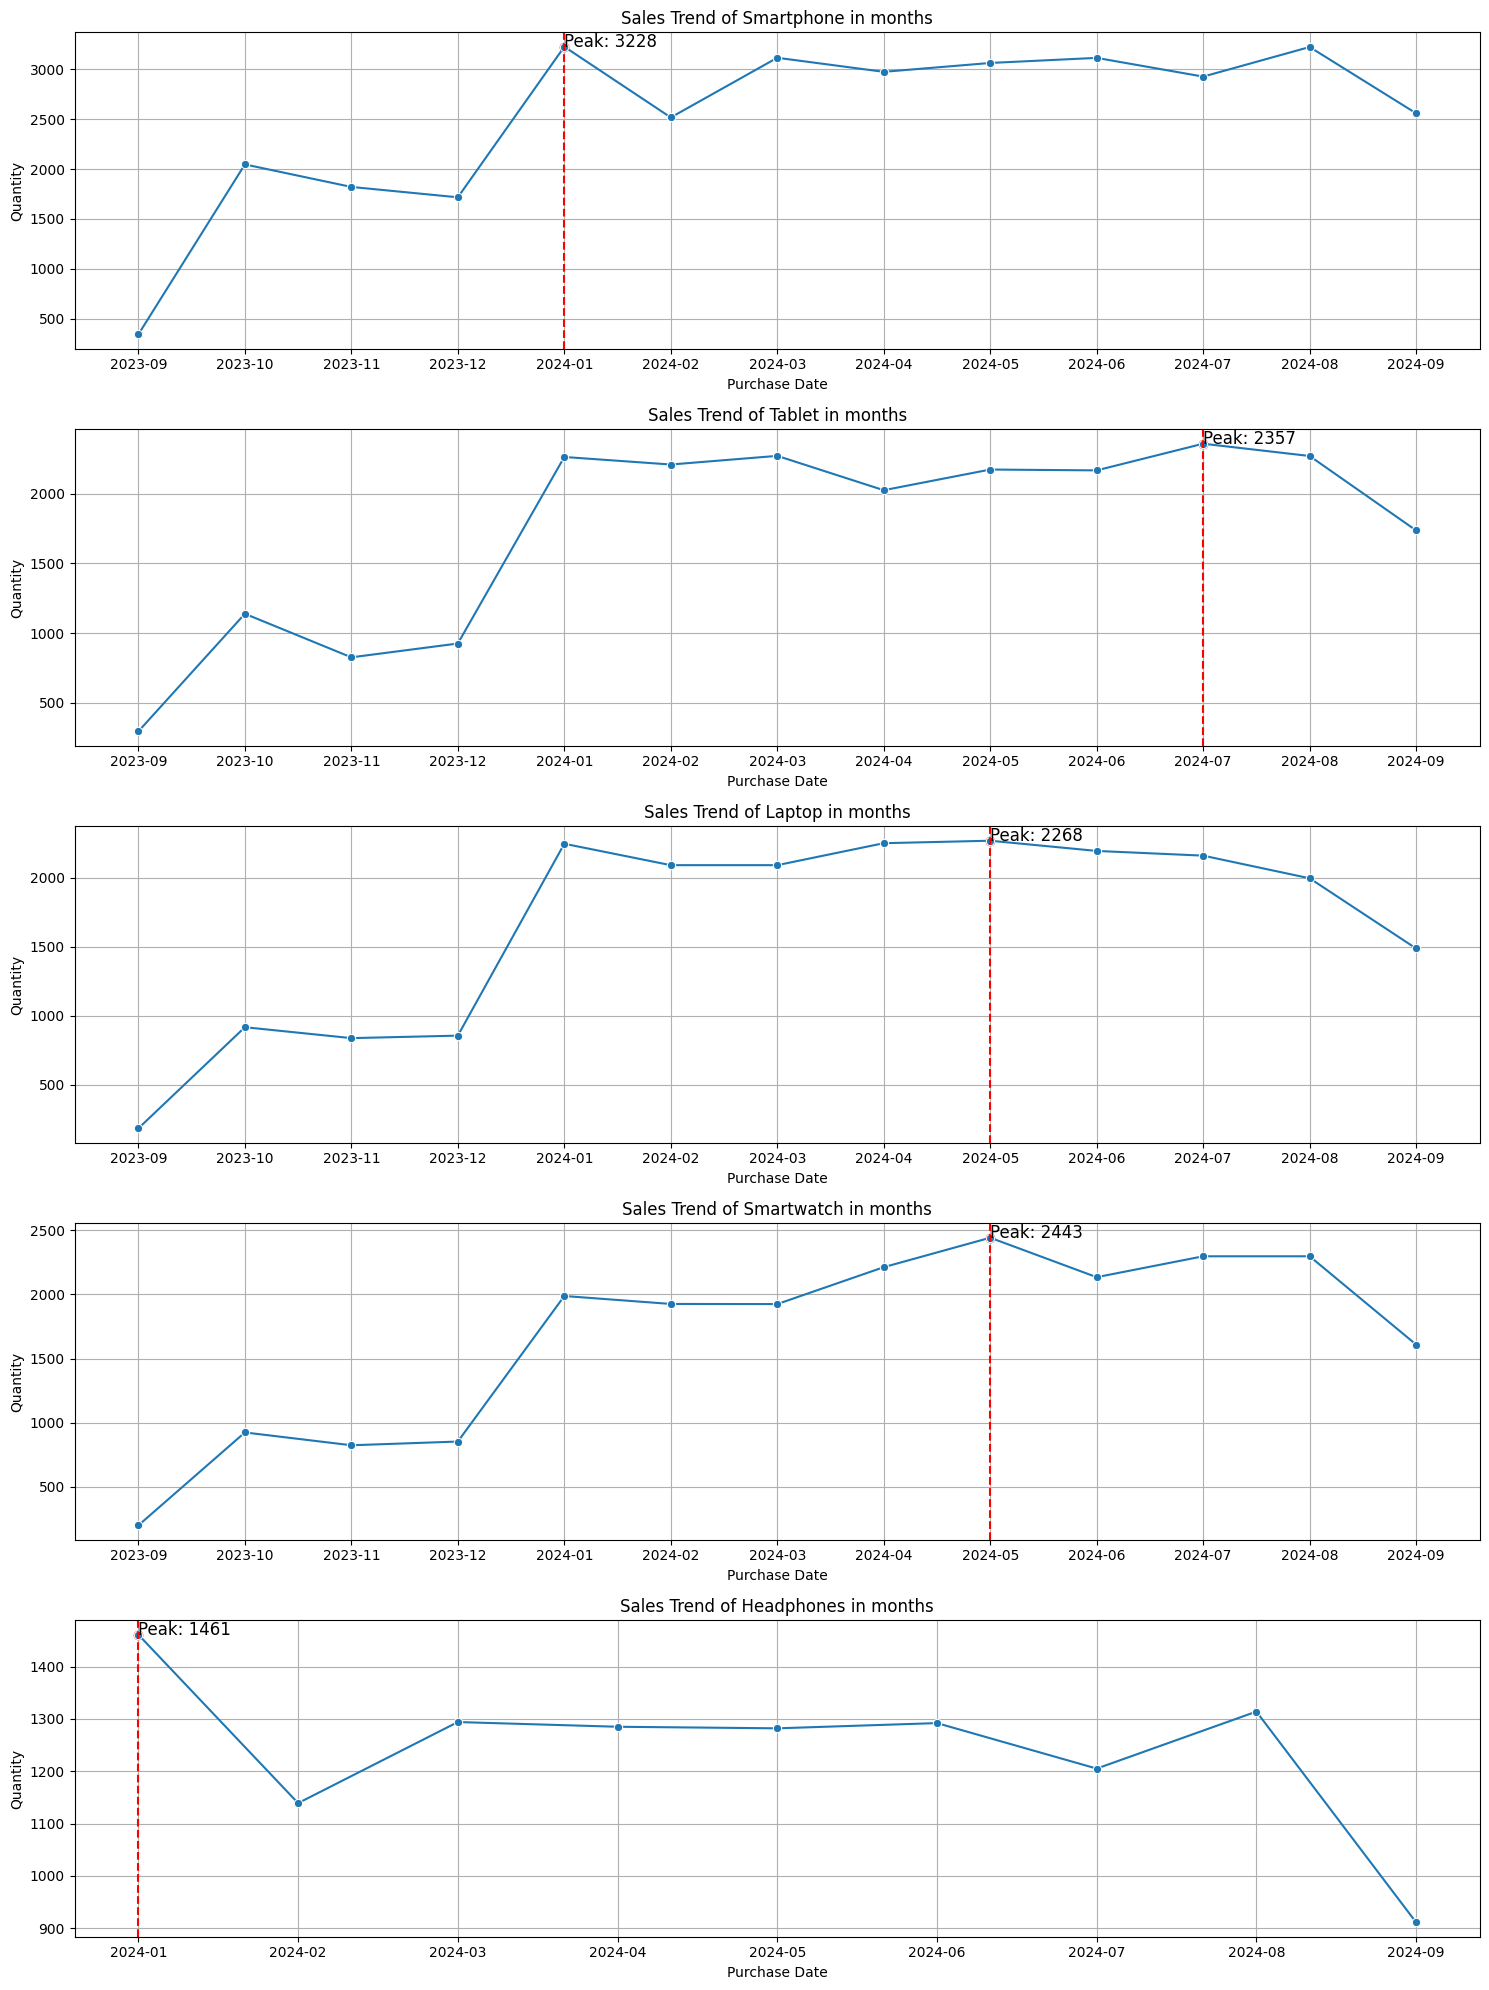

In [25]:
# Sales trend of each product type in months pattern
product_types = datetime_eda_df['Product Type'].value_counts()
fig_row = len(product_types)
fig, axes = plt.subplots(fig_row, 1, figsize=(15, 4 * fig_row))
for id, product in enumerate(product_types.index):
    data = datetime_eda_df[datetime_eda_df['Product Type'] == product]
    grouped_data = data.groupby('yyyy-mm')['Quantity'].sum().reset_index().sort_index()
    grouped_data['Quantity'] = grouped_data['Quantity'].astype(int)
    grouped_data['yyyy-mm'] = grouped_data['yyyy-mm'].astype(str)

    sns.lineplot(data=grouped_data, x='yyyy-mm',
                 y='Quantity', ax=axes[id], marker='o')
    
    peak_idx = np.argmax(grouped_data['Quantity'])
    peak_x = grouped_data['yyyy-mm'][peak_idx]
    peak_y = grouped_data['Quantity'][peak_idx]
    axes[id].axvline(peak_x, linestyle='--', color='red', label='Peak')
    axes[id].scatter(peak_x, peak_y, color='red')
    axes[id].text(peak_x, peak_y, f'Peak: {peak_y}', fontsize=12)

    axes[id].set_title(f'Sales Trend of {product} in months')
    axes[id].set_ylabel('Quantity')
    axes[id].set_xlabel('Purchase Date')
    axes[id].grid(True)
    
plt.tight_layout()
plt.show()

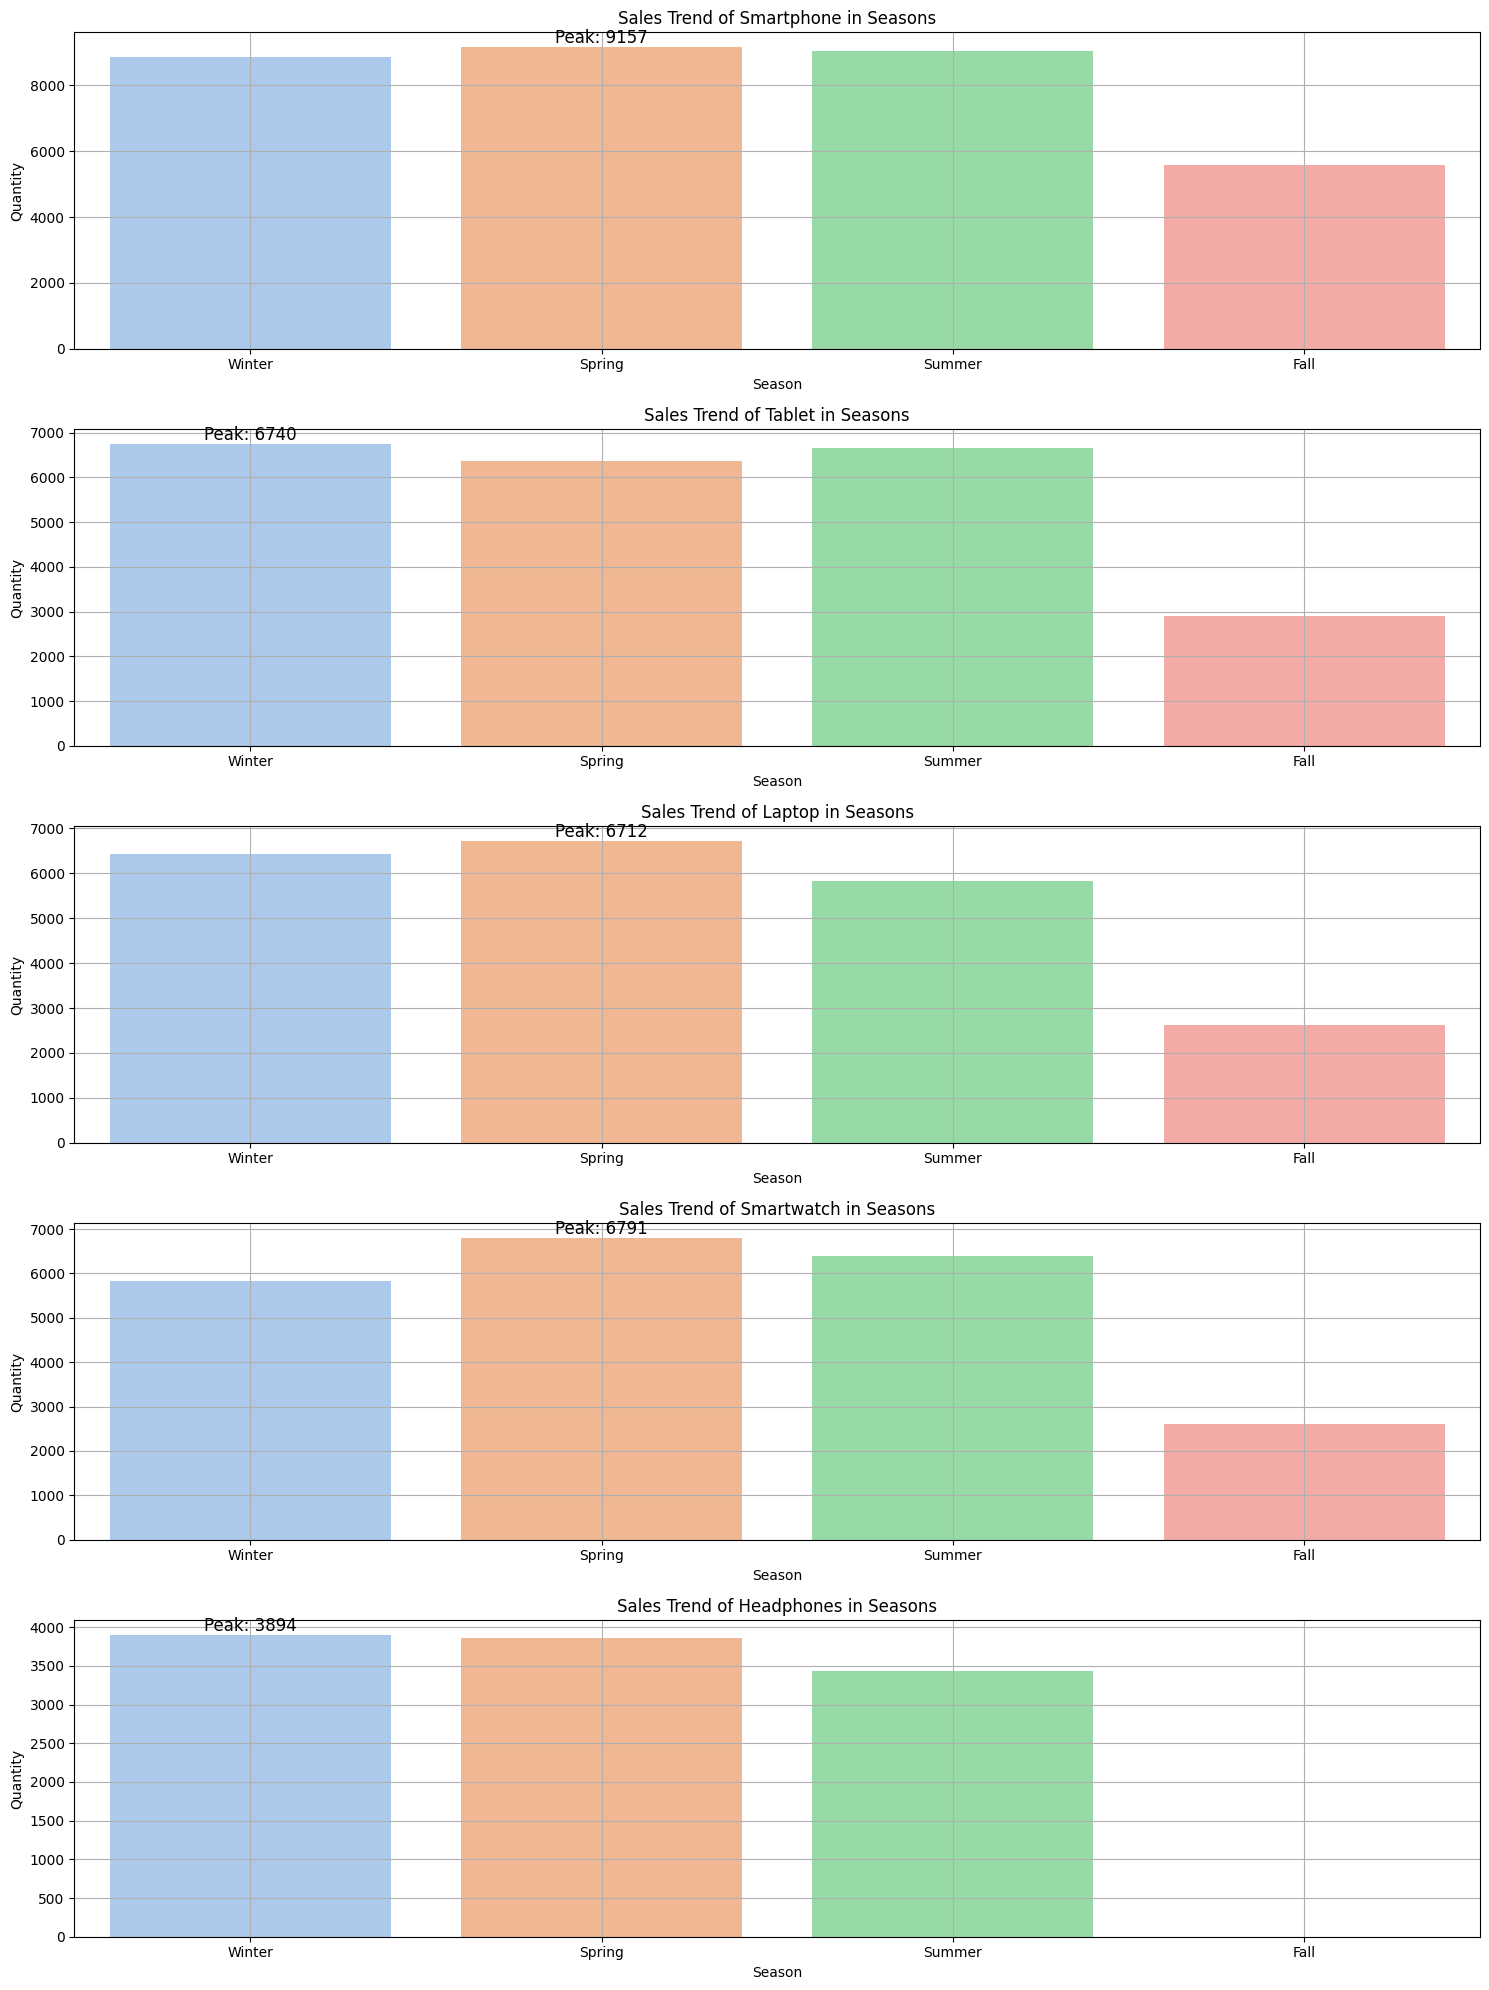

In [26]:
# Sales trend of each product type in seasons pattern
product_types = datetime_eda_df['Product Type'].value_counts()
fig_row = len(product_types)
fig, axes = plt.subplots(fig_row, 1, figsize=(15, 4 * fig_row))

seasons_name = ['Winter', 'Spring', 'Summer', 'Fall']
seasons = [0, 1, 2, 3]
seasons_eda_df = datetime_eda_df.copy()
seasons_eda_df["Season"] = pd.cut(seasons_eda_df["Month"], bins=[0, 3, 6, 9, 12], labels=seasons_name)

for id, product in enumerate(product_types.index):
    data = seasons_eda_df[seasons_eda_df['Product Type'] == product]
    grouped_data = data.groupby('Season')['Quantity'].sum().reset_index()
    grouped_data['Quantity'] = grouped_data['Quantity'].astype(int)
    
    sns.barplot(data=grouped_data, x='Season',
                y='Quantity', ax=axes[id], palette='pastel', hue='Season')  
    
    peak_idx = grouped_data['Quantity'].idxmax()
    peak_y = grouped_data.loc[peak_idx, 'Quantity']
    
    axes[id].text(peak_idx, peak_y, f'Peak: {peak_y}', 
                 ha='center', va='bottom', fontsize=12)

    axes[id].set_title(f'Sales Trend of {product} in Seasons')
    axes[id].set_ylabel('Quantity')
    axes[id].set_xlabel('Season')
    axes[id].grid(True)
    
plt.tight_layout()
plt.show()

Based on the visualizations, here are the key insights about sales patterns:

1. Day of Week Patterns:
- Smartphones show highest sales on Thursdays
- Tablets peak on Mondays
- Laptops have strongest sales on Fridays
- Smartwatches sell best mid-week (Wednesday/Thursday)
- Headphones show highest sales early week (Monday/Tuesday)

2. Monthly Patterns:
- Most products show cyclical patterns with peaks every 3-4 months
- January and July tend to be strong months across categories
- Significant dips observed in February and September
- Holiday season (December) shows increased sales for most categories

3. Seasonal Trends:
- Winter season leads sales for most product categories
- Spring follows as second strongest season
- Summer shows moderate sales performance
- Fall generally has lowest sales numbers
- Electronics buying follows typical retail seasonality with stronger performance during winter holidays

### **4.2 Question 2**

In [27]:
# To accurately count the Members we need to look at UNIQUE customer_ID
Member_counts = df.groupby('Loyalty Member')['Customer ID'].nunique().reset_index()
Member_counts.columns = ['Loyalty Member', 'Count']
Member_counts = Member_counts.sort_values(by='Count', ascending=False)

Member_counts

,Loyalty Member,Count
0,No,10572
1,Yes,3834


In [28]:
# Copy data so we can use it for determining loyalty member status
loyalty_df = df.copy()

# Sort by Customer ID and Purchase Date
loyalty_df.sort_values(by=['Customer ID', 'Purchase Date'], inplace=True)

# Determine loyalty status
def determine_loyalty_status(group):
    statuses = []
    previous_status = None
    
    for _, row in group.iterrows():
        current_status = row['Loyalty Member']
        
        if previous_status is None:  # First order
            if current_status == 'Yes':
                statuses.append('Regular Member')
            else:
                statuses.append('Non Member')
        else:
            if previous_status == 'Yes' and current_status == 'No':
                statuses.append('Churned')
            elif previous_status == 'No' and current_status == 'Yes':
                statuses.append('New Member')
            elif current_status == 'Yes':
                statuses.append('Regular Member')
            else:
                statuses.append('Non Member')
        
        previous_status = current_status
    
    return pd.Series(statuses, index=group.index)

# Apply the function to get member statuses
loyalty_df['Loyalty Status'] = loyalty_df.groupby('Customer ID').apply(determine_loyalty_status).reset_index(drop=True)

# Display updated info
loyalty_df

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total,Loyalty Status
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21,Non Member
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09,Non Member
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,None,0.00,Non Member
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16,New Member
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56,Regular Member
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,27,Female,No,Smartphone,SMP234,4,Completed,Bank Transfer,6838.08,1139.68,6,2024-06-15,Expedited,None,0.00,Non Member
19996,19996,27,Female,Yes,Laptop,LTP123,4,Cancelled,Credit Card,2697.28,674.32,4,2024-07-18,Standard,None,0.00,New Member
19997,19996,27,Female,No,Headphones,HDP456,4,Completed,Bank Transfer,1805.90,361.18,5,2024-08-26,Standard,"Impulse Item, Extended Warranty, Accessory",198.98,Churned
19998,19997,27,Male,No,Headphones,HDP456,1,Cancelled,Bank Transfer,2528.26,361.18,7,2024-01-06,Expedited,"Extended Warranty, Accessory",101.34,Non Member


In [29]:
# Visualize member counts
New_Member_counts = loyalty_df.groupby('Loyalty Status')['Customer ID'].nunique().reset_index()

New_Member_counts.columns = ['Loyalty Status', 'Count']

New_Member_counts = New_Member_counts.sort_values(by='Count', ascending=False)

New_Member_counts

,Loyalty Status,Count
2,Non Member,9805
3,Regular Member,2682
0,Churned,1353
1,New Member,1328


- New memberships status counts visualized¶

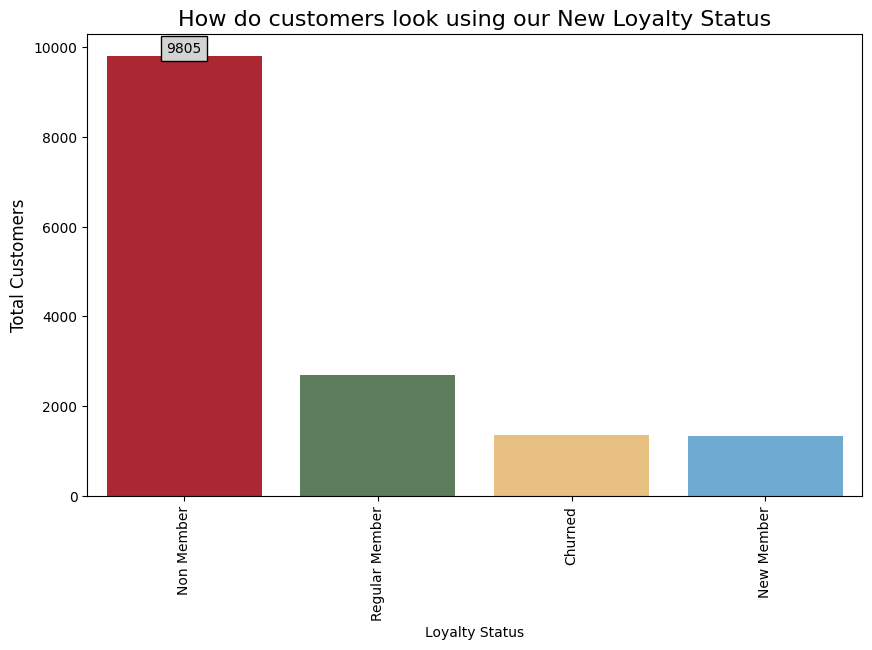

In [30]:
# Visualize New status memberships

colors = ["#c1121f", "#588157", "#f8c471", "#5dade2"]

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=New_Member_counts, x='Loyalty Status', y='Count', palette=colors)
plt.title('How do customers look using our New Loyalty Status', fontsize=16)
plt.xlabel('Loyalty Status', fontsize=10)
plt.ylabel('Total Customers', fontsize=12)
ax.bar_label(ax.containers[0], bbox=dict(facecolor='lightgrey'))

plt.xticks(rotation=90)
plt.show()

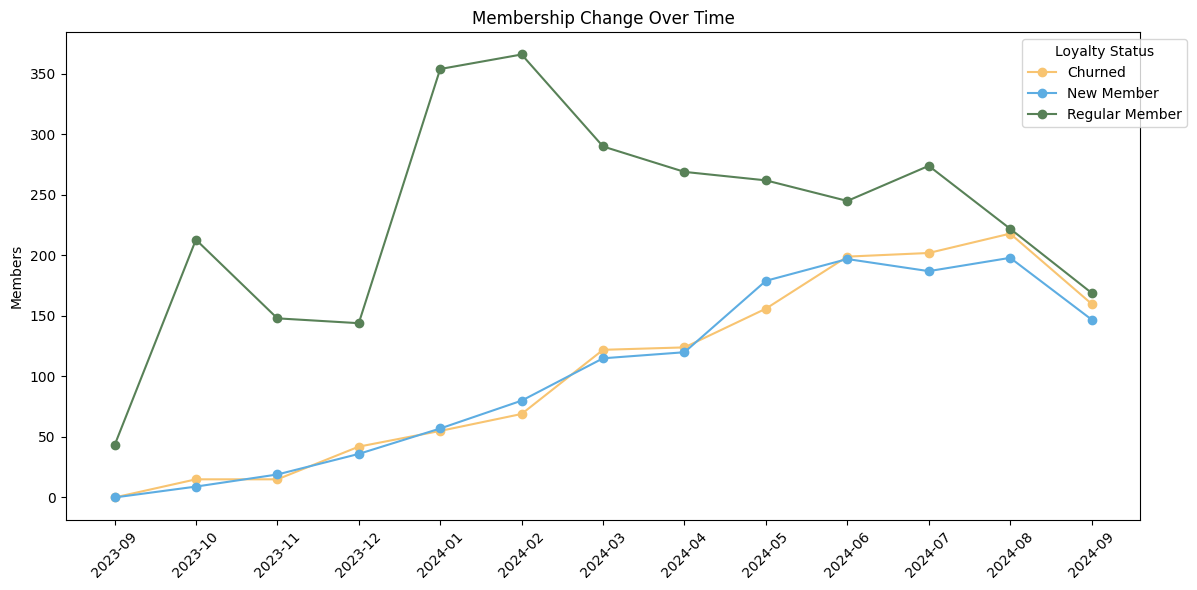

In [31]:
# Visualize membership over time
colors = {
    'Regular Member': "#588157",
    'Non Member': "#c1121f",
    'Churned': "#f8c471",
    'New Member': "#5dade2"
}

# Extract month and year from purchase date
loyalty_df['YearMonth'] = loyalty_df['Purchase Date'].dt.to_period('M')
loyalty_df = loyalty_df[loyalty_df["Loyalty Status"] != "Non Member"]

# Count each loyalty status per month
members_counts = loyalty_df.groupby(['YearMonth', 'Loyalty Status']).size().reset_index(name='Count')

# Pivot the data to have statuses as columns
members_pivot = members_counts.pivot(index='YearMonth', columns='Loyalty Status', values='Count').fillna(0)

# Plot
plt.figure(figsize=(12, 6))

# Use a line plot for better visibility of trends
for status in members_pivot.columns:
    plt.plot(members_pivot.index.astype(str), members_pivot[status], marker='o', label=status, color=colors.get(status))

plt.title('Membership Change Over Time')
plt.xlabel('') # remove Date label because this data is obvious
plt.ylabel('Members')
plt.xticks(rotation=45)
plt.legend(title='Loyalty Status', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

### **4.3 Question 3**

## **5. Reflection**

### **5.1. What difficulties have you encountered?**

- **Ngoc Linh**: One of the main difficulties I encountered was understanding the dataset and its context. Additionally, during the Exploratory Data Analysis phase, learning to use tools like Matplotlib and Seaborn effectively was demanding. Choosing the right visualization techniques to present meaningful insights also required significant effort and attention.
- **Lien Hoa**: The data preprocessing stage is one of the important stages and fortunately, the data in this dataset is relatively clean. However, the lack of knowledge on this issue made it quite difficult for me in Exploratory Data Analysis (EDA) phase to be able to ask meaningful questions based on this dataset. This problem caused me to spend quite a lot of time to choose the most reasonable questions that I could within my ability.
- **Thanh Tu**:

### **5.2. What have you learned?**

- **Ngoc Linh**:Throughout this project, I gained valuable insights into data analysis and visualization. I improved my technical skills by working with tools like Pandas, Matplotlib, and Seaborn to clean and analyze data and create meaningful visualizations. Additionally, I learned the importance of domain knowledge in interpreting data and asking the right questions during Exploratory Data Analysis. Overall, it has been a rewarding experience that enhanced my problem-solving abilities and deepened my understanding of the data analysis process.
- **Lien Hoa**: Through this project, I have gained a basic understanding of the stages of data science and some basic knowledge about how features affecting sales. At the same time, I have also improved and learned more about data processing and visualization skills.
- **Thanh Tu**:

### **5.3. If you had more time, what would you do?**

## **References**

- Slides and lectures in Programming for Data Science course by Teacher *Pham Trong Nghia*
- Electronic Sales Data [Dataset](https://www.kaggle.com/datasets/cameronseamons/electronic-sales-sep2023-sep2024)
- Plot any charts with [matplotlib](https://matplotlib.org/stable/gallery/index.html#examples-index)
- For questioning reference:
    - [Customer Purchase Behavior Analysis](https://www.kaggle.com/code/cameronseamons/customer-purchase-behavior-analysis
)
